# Checking to see why most selected Nback tasks start with 2-back

My guess is that it is because of the VIFs for the vs baseline contrasts.  There's very slightly less interference with baseline since the stroop "warm up" trials requires 2 trials and these starter trials are modeled as a separate regressor and they will be collinear with the baseline prior to the warm up.  There isn't baseline prior to the first block, so if that block is 2-back those warm-up trials do not interfere with any baseline and there are fewer 2-back warmup trials to interfere with the other baseline.

In [1]:
import os
import shutil
import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sys.path.append(
    '/Users/jeanettemumford/Dropbox/Research/Projects/patrick/efficiency_rdoc'
)

%load_ext autoreload
%autoreload 2
from utils import (
    calc_avg_prob_next_given_last1_and_last2,
    calc_expected_run_num_by_chance,
    est_psych_fitness,
)

In [2]:
# simulation output data location.  This dataset was generated on Sherlock and copied to my local machine to run this.
outdir = '/Users/jeanettemumford/Dropbox/Research/Projects/patrick/efficiency_output/'


def get_events_eff_data(outdir, task):
    events_all = []
    for i in range(1, 6):
        events = pd.read_pickle(f'{outdir}/{task}_events_{i}.pkl')
        events_all.extend(events)

    output_list = []

    for i in range(1, 6):
        output_list.append(pd.read_csv(f'{outdir}/{task}_output_{i}.csv'))
    output_all = pd.concat(output_list, ignore_index=True)
    output_all = output_all.loc[:, ~output_all.columns.str.contains('^Unnamed')]
    ranks = {col: np.argsort(output_all[col].to_numpy()) for col in output_all.columns}
    return events_all, output_all, ranks

In [3]:
events_nback, output_nback, ranks_nback = get_events_eff_data(outdir, 'nback')
print(output_nback.shape)

(100000, 16)


For the first 1000 designs I'll extract the VIFs and separate by whether the first block is 1-back or 2-back

In [4]:
output_nback.shape

(100000, 16)

In [6]:
first_trial = []
for df in events_nback:
    df = df.reset_index()
    first_trial.append(df.loc[3, 'trial_type'])

In [10]:
output_nback['first_block'] = first_trial

In [8]:
output_nback.columns

Index(['eff_1back_v_baseline', 'eff_2back_v_baseline', 'eff_all_task',
       'eff_2back-1back', 'vif_1back_v_baseline', 'vif_2back_v_baseline',
       'vif_all_task', 'vif_2back-1back', 'scan_length', 'kao_measure',
       'prob_runs_gte_2', 'run_num_diff_from_avg', 'prob_next_given_last1',
       'prob_next_given_last2', 'sum_abs_diff_prob_next_given_last1',
       'sum_abs_diff_prob_next_given_last2', 'first_trial'],
      dtype='object')

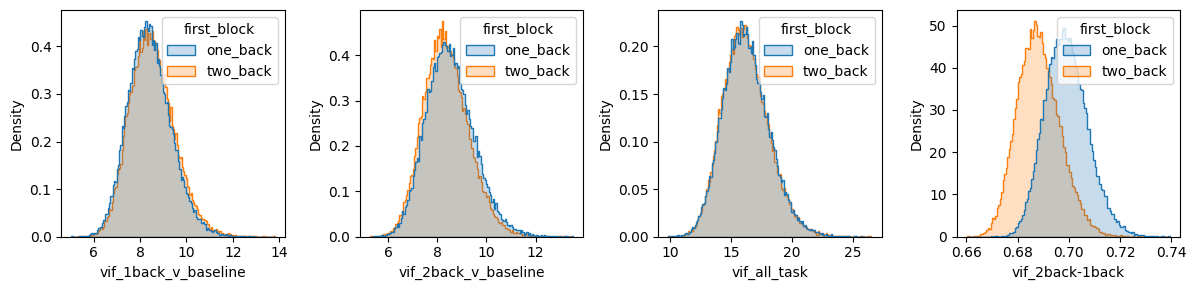

In [13]:
# Plot the histograms of 'vif_all_task' with separate distributions for each 'trial_type'
fig, axs = plt.subplots(1, 4, figsize=(12, 3))

axes = axs.flatten()

variables = [
    'vif_1back_v_baseline',
    'vif_2back_v_baseline',
    'vif_all_task',
    'vif_2back-1back',
]

for i, varname in enumerate(variables):
    sns.histplot(
        data=output_nback,
        x=varname,
        hue='first_block',
        element='step',
        stat='density',
        common_norm=False,
        ax=axes[i],
    )
    axes[i].set_xlabel(varname)
    axes[i].set_ylabel('Density')

plt.tight_layout()
plt.show()

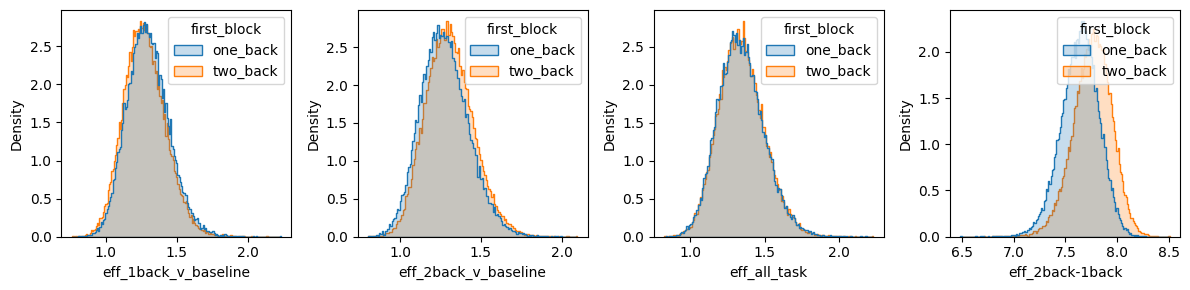

In [14]:
# Plot the histograms of 'vif_all_task' with separate distributions for each 'trial_type'
fig, axs = plt.subplots(1, 4, figsize=(12, 3))

axes = axs.flatten()

variables = [name for name in output_nback.columns if 'eff' in name]

for i, varname in enumerate(variables):
    sns.histplot(
        data=output_nback,
        x=varname,
        hue='first_block',
        element='step',
        stat='density',
        common_norm=False,
        ax=axes[i],
    )
    axes[i].set_xlabel(varname)
    axes[i].set_ylabel('Density')

plt.tight_layout()
plt.show()